In [2]:
# 올바른 결과를 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다
# 표준점수로 특성의 스케일 변환

# 앞쪽 35개는 도미(1), 뒤쪽 14개는 빙어(0)  -> 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
# 전에는 파이썬 리스트를 for문과 zip을 이용해서 배열로 만듦
# numpy 에는 이 기능이 내장되어 있는 메서드가 있음
import numpy as np

np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [7]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [10]:
# numpy 메서드로 target 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# fish_target_before = [1]*35 + [0]*14
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42)
# stratify=fish_target 클래스의 비율도 맞춰줌. 샘플링편향 방지
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


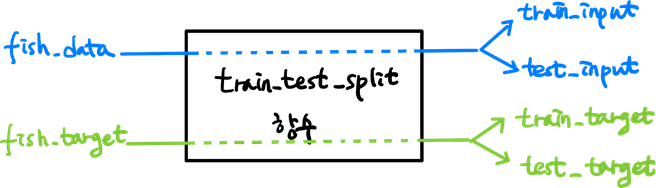

In [29]:
print(np.count_nonzero(train_target == 0),np.count_nonzero(train_target == 1))  # train_target에서 0과1의 개수 출력
print(np.count_nonzero(test_target == 0),np.count_nonzero(test_target == 1))  # test_target에서 0과1의 개수 출력

10 26
4 9


In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [24]:
kn.score(test_input, test_target)

1.0

In [108]:
print(kn.predict([[25,150]]))

[0.]


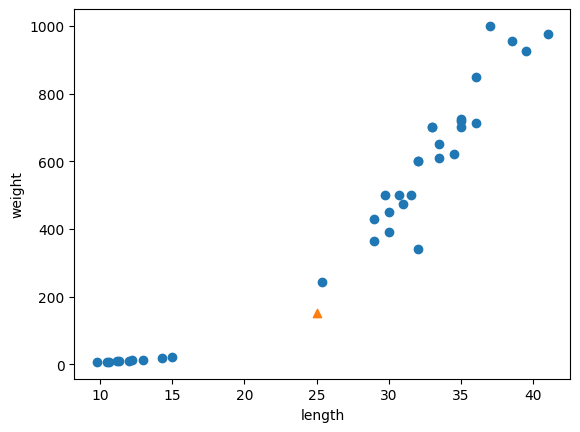

In [88]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
# 마커 종류 변경 https://pyvisuall.tistory.com/39
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [91]:
print(train_input[:5,0])

[29.7 12.2 33.  11.3 39.5]


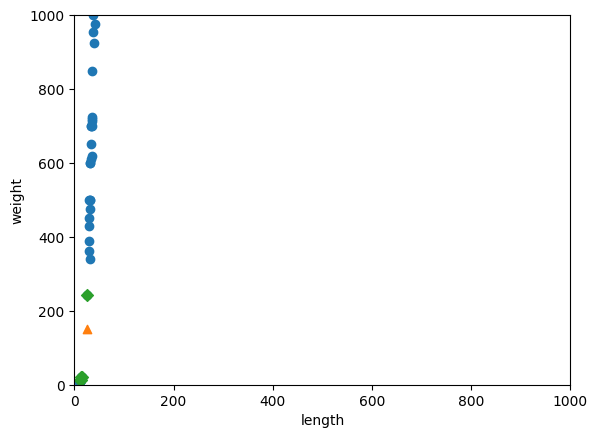

In [92]:
# x와 y축의 비율이 다름

distances, indexes= kn.kneighbors([[25,150]])   # 이웃5개의 거리와 인덱스 리스트로 저장
# indexes = [[21 33 19 30  1]]

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 배열인덱싱   ,0 길이 / ,1 무게

plt.xlim((0,1000))
plt.ylim((0,1000)) # x,y 축 범위지정

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 축의 값범위의 위험성을 알아보았다

In [93]:
print(train_input[indexes]) # 도미1, 빙어4

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [94]:
# 두 특성의 값의 범위가 다름 -> 스케일이 다르다고 표현
# 특성간의 스케일을 맞춰줄 필요가 있다 (데이터 전처리)

# 평균 구해보기 (자주쓰이는 전처리: 표준점수, z점수)
# 표준점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져있는지를 나타냄
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸 값
# 표쥰편차는 분산의 제곱근
# 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져있는지를 나타내는 값

mean = np.mean(train_input, axis=0) # axis : 중심선
std = np.std(train_input, axis=0)   # 표준편차
print(mean)
print(std)

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]


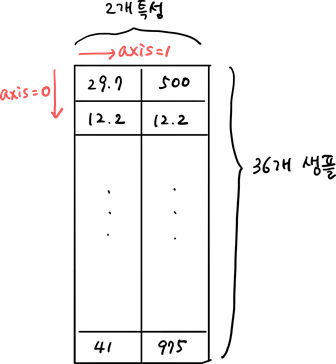

In [78]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환
train_scaled = (train_input - mean) /std

# numpy 는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼줌
# std에 있는 두 표준편차를 다시 모든 행에 적용 (브로드캐스팅)

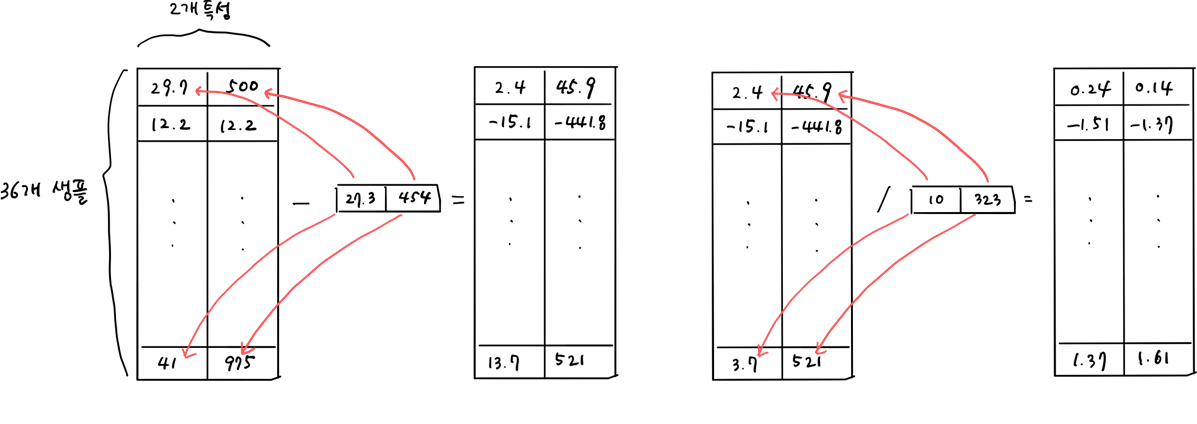

In [ ]:
# [41,975] -> [1.37,1.61] 표준화됨

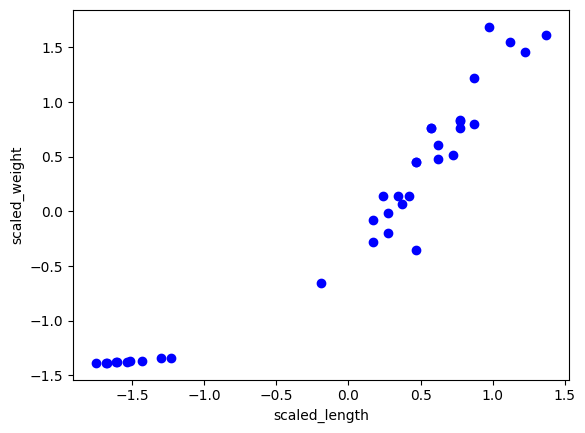

In [106]:
# train_scaled 데이터를 산점도로 시각화
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], color='blue', label='Scaled Data')

# plt.scatter(25,150, marker='^')  # 표준점수화 필요

# 축 레이블 추가
plt.xlabel("scaled_length")
plt.ylabel("scaled_weight")

# 그래프 표시
plt.show()

In [130]:
new = ([25,150] - mean) /std
print(new)

[-0.23012627 -0.94060693]


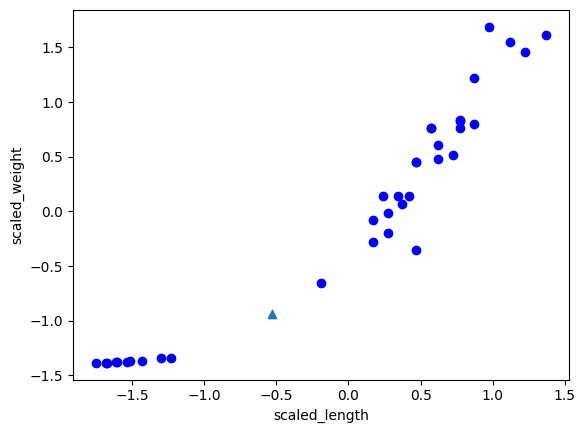

In [128]:
# train_scaled 데이터를 산점도로 시각화
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], color='blue', label='Scaled Data')

plt.scatter(new[0],new[1], marker='^')

# 축 레이블 추가
plt.xlabel("scaled_length")
plt.ylabel("scaled_weight")

# 그래프 표시
plt.show()

In [117]:
# 테스트 데이터도 스케일링
test_scaled = (test_input - mean) / std
kn.score = (test_scaled, test_target)

In [131]:
# 재훈련 후 예측
kn.fit(train_scaled , train_target)
print(kn.predict([new])) # 1(도미) 예측 성공

[1.]


In [122]:
def fish_predict(length,weight):
    plt.scatter(train_input[:,0], train_input[:,1])
    plt.scatter(length,weight, marker='^')
    # 마커 종류 변경 https://pyvisuall.tistory.com/39
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()
    new = ([length,weight] - mean) /std
    return kn.predict([new])

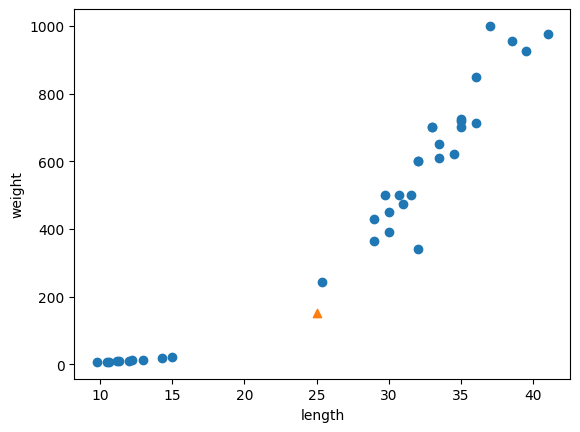

[1.]


In [132]:
print(fish_predict(25,150))